In [1]:
import numpy as np
import pandas as pd
from scipy.fft import fft, ifft, fftfreq, fftshift
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(".\multiTimeline.csv", sep=",", skiprows=1, header=0)
cols = df.columns
df["slno"] = df.index
df["date"] = pd.to_datetime(df[cols[0]], format="%Y-%m-%d")
df["year"] = df[cols[0]].str.split("-").str[0]
df["month"] = df[cols[0]].str.split("-").str[1]
df["day"] = df[cols[0]].str.split("-").str[2]
df["item"] = cols[1].split(" ")[0][:-1]
df["region"] = cols[1].split(" ")[1][1:-1]
df["volume"] = df[cols[1]]
df.drop(cols, axis=1, inplace=True)
df.head()

,slno,date,year,month,day,item,region,volume
0,0,2021-02-14,2021,02,14,Oxygen,India,2
1,1,2021-02-15,2021,02,15,Oxygen,India,0
2,2,2021-02-16,2021,02,16,Oxygen,India,2
3,3,2021-02-17,2021,02,17,Oxygen,India,4
4,4,2021-02-18,2021,02,18,Oxygen,India,6


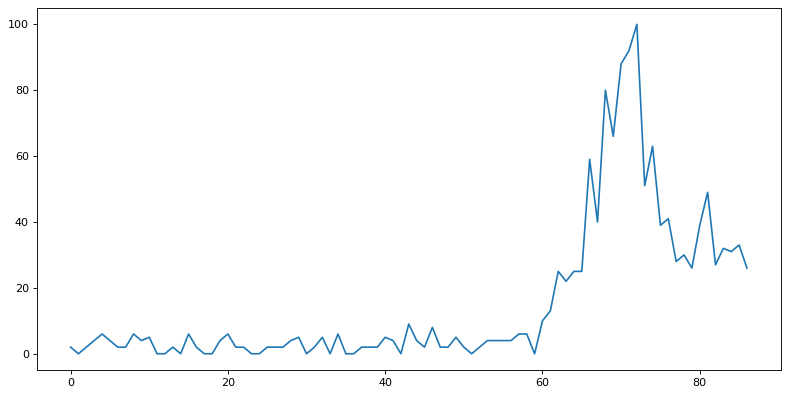

In [3]:
funtion_of_time = df.volume.values
t = df.slno.values
no_of_sample = len(funtion_of_time)
# Generate a 2 hertz sine wave that lasts for 5 seconds
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(t, funtion_of_time);

#### FFFT

In [4]:
funtion_of_freq = fft(funtion_of_time)

In [5]:
power = np.abs(funtion_of_freq)**2
sample_freq = fftfreq(no_of_sample, 1/(no_of_sample))
pos_mask = np.where(sample_freq > 0)
freq = sample_freq[pos_mask]
peak_freq = freq[power[pos_mask].argmax()]

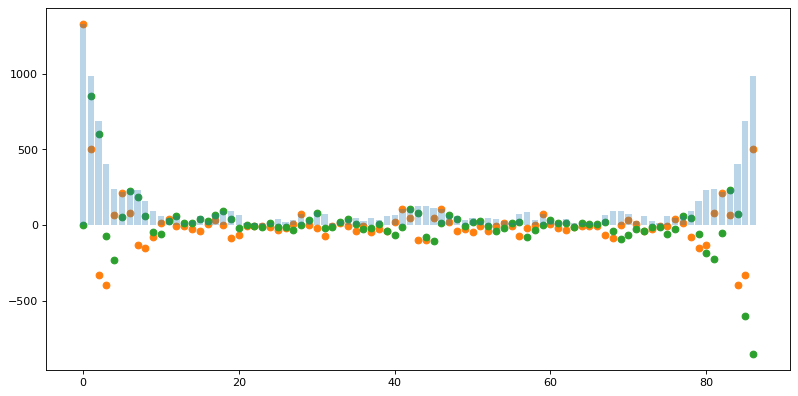

In [6]:
plt.figure(figsize=(12, 6), dpi=80)
plt.bar(np.arange(0, no_of_sample), np.abs(funtion_of_freq), alpha=0.3)
plt.scatter(np.arange(0, no_of_sample), funtion_of_freq.real)
plt.scatter(np.arange(0, no_of_sample), funtion_of_freq.imag)
plt.show();

In [7]:
sample_freq

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
       -43., -42., -41., -40., -39., -38., -37., -36., -35., -34., -33.,
       -32., -31., -30., -29., -28., -27., -26., -25., -24., -23., -22.,
       -21., -20., -19., -18., -17., -16., -15., -14., -13., -12., -11.,
       -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.])

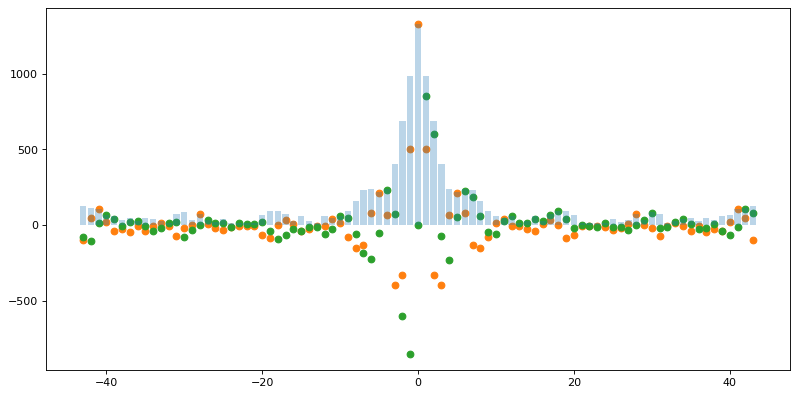

In [8]:
plt.figure(figsize=(12, 6), dpi=80)
plt.bar(sample_freq, np.abs(funtion_of_freq), alpha=0.3)
plt.scatter(sample_freq, funtion_of_freq.real)
plt.scatter(sample_freq, funtion_of_freq.imag)
plt.show();

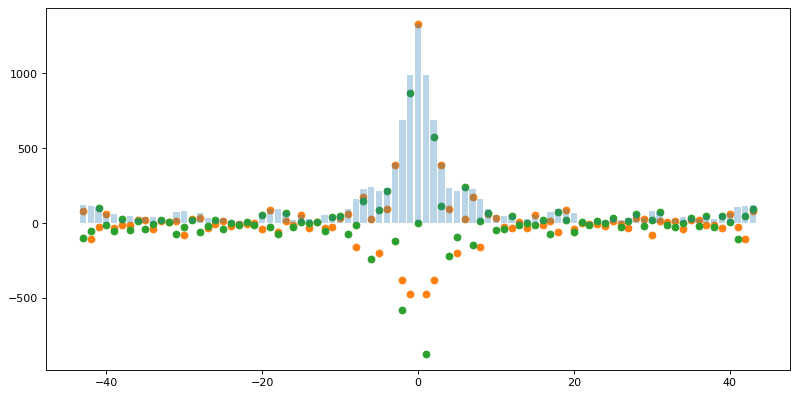

In [9]:
plt.figure(figsize=(12, 6), dpi=80)
plt.bar(sample_freq, np.abs(fft(fftshift(funtion_of_time))), alpha=0.3)
plt.scatter(sample_freq, fft(fftshift(funtion_of_time)).real)
plt.scatter(sample_freq, fft(fftshift(funtion_of_time)).imag)
plt.show();

#plt.plot(np.abs(fft(funtion_of_time)) - np.abs(fft(fftshift(funtion_of_time))))
#plt.ylim(-1,1)

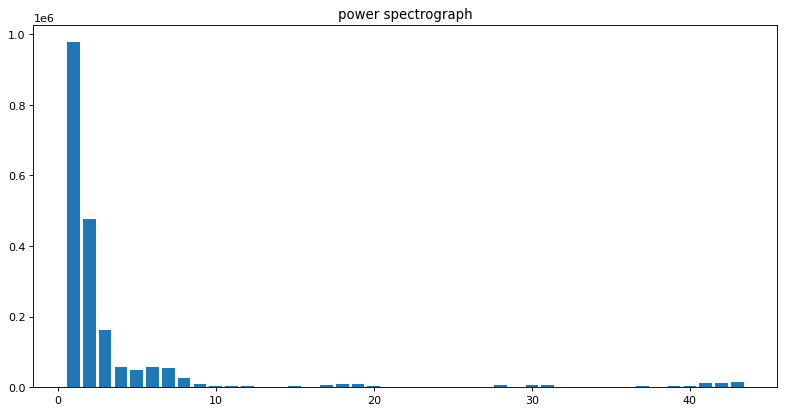

In [10]:
plt.figure(figsize=(12, 6), dpi=80)
plt.bar(freq, power[pos_mask])
plt.title("power spectrograph")
plt.show();

In [11]:
POWER_TH = 50000

In [12]:
funtion_of_freq_clean = funtion_of_freq.copy()
funtion_of_freq_clean[power>=POWER_TH]=0
funtion_of_time_clean = ifft(funtion_of_freq_clean)

In [13]:
funtion_of_freq_clean_prm = funtion_of_freq.copy()
funtion_of_freq_clean_prm[power<POWER_TH]=0
funtion_of_time_clean_prm = ifft(funtion_of_freq_clean_prm)

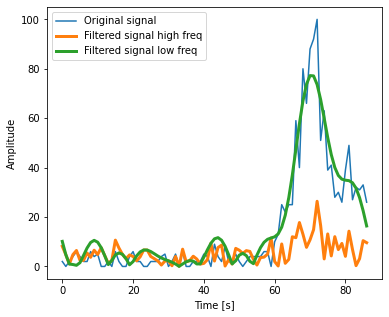

In [14]:
plt.figure(figsize=(6, 5))
plt.plot(t, funtion_of_time, label='Original signal')
plt.plot(t, np.abs(funtion_of_time_clean), linewidth=3, label='Filtered signal high freq')
plt.plot(t, np.abs(funtion_of_time_clean_prm), linewidth=3, label='Filtered signal low freq')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='best')

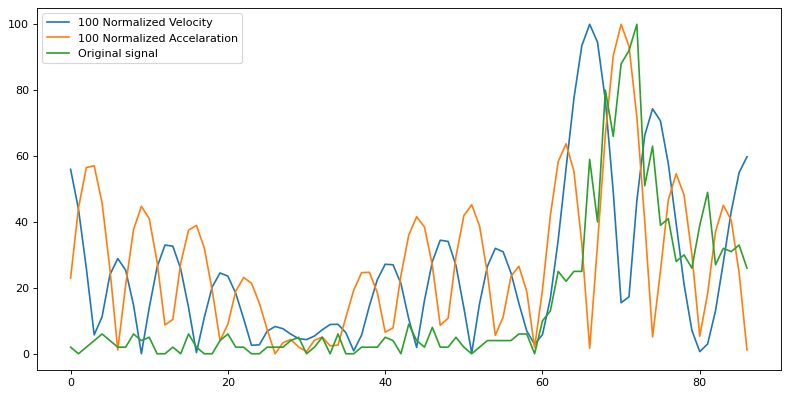

In [15]:
plt.figure(figsize=(12, 6), dpi=80)
freq_prm = sample_freq.copy()
freq_prm[(np.abs(funtion_of_freq_clean_prm)**2)<1] = 0
vel = np.abs(ifft(1j * funtion_of_freq_clean_prm * freq_prm))
acc = np.abs(ifft(-1 * funtion_of_freq_clean_prm * freq_prm ** 2))
plt.plot(t, (vel - vel.min()) * 100/(vel.max() - vel.min()), label='100 Normalized Velocity')
plt.plot(t, (acc - acc.min()) * 100/(acc.max() - acc.min()), label='100 Normalized Accelaration')
plt.plot(t, funtion_of_time, label='Original signal')
plt.legend(loc='best')